#### About

> Diffusion models

Diffusion models, also known as diffusion processes or diffusion equations, are mathematical models that describe the diffusion of a quantity or diffusion in a medium over time. They are widely used in various fields, including physics, chemistry, biology, finance, and image processing. The basic idea behind diffusion models is that the quantity being modeled (such as heat, concentration, or information) tends to diffuse from areas of high concentration to areas of low concentration. The rate of diffusion depends on the concentration gradient, the difference in concentration between adjacent areas. The higher the concentration gradient, the faster the diffusion.

A commonly used diffusion model is the diffusion equation, which is a partial differential equation (PDE) that describes the time evolution of the diffusive quantity. Diffusion equations are usually expressed in the following form:

∂u/∂t = D∇^2u


where u is the diffusive quantity, t is time, D is the diffusion coefficient, and ∇^2u is the Laplace operator applied to u representing the spatial gradient of u. The diffusion equation describes how the concentration "u" changes with time due to diffusion and the diffusion coefficient "D" determines the rate of diffusion. Diffusion models can be used to model and analyze a variety of diffusion phenomena, such as heat conduction, chemical diffusion, and the spread of information in social networks. 

They can also be used in image processing tasks such as image segmentation and image smoothing, where a diffusion process is used to spread information between adjacent pixels to improve image quality. 

In [22]:
from keras.models import Sequential
from keras.layers import Conv2D, UpSampling2D
from keras.datasets import mnist
import matplotlib.pyplot as plt


In [15]:
# Load and preprocess the MNIST dataset
(x_train, _), (x_test, _) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape(-1, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)

In [16]:
# Define the diffusion model
def diffusion_model():
    model = Sequential()
    # Encoder
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same', input_shape=(28, 28, 1)))
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    # Decoder
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(16, (3, 3), activation='relu', padding='same'))
    model.add(Conv2D(1, (3, 3), activation='sigmoid', padding='same'))
    return model


In [17]:
# Create the diffusion model
model = diffusion_model()

In [18]:

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy')


In [20]:

# Train the diffusion model
model.fit(x_train, x_train, epochs=1, batch_size=128, validation_split=0.2)


375/375 [==============================] - 114s 304ms/step - loss: 0.0620 - val_loss: 0.0615


In [21]:
# Function to plot original and predicted images
def plot_images(original, predicted):
    n = min(original.shape[0], 10)
    plt.figure(figsize=(20, 4))
    for i in range(n):
        # Original image
        ax = plt.subplot(2, n, i + 1)
        plt.imshow(original[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

        # Predicted image
        ax = plt.subplot(2, n, i + 1 + n)
        plt.imshow(predicted[i].reshape(28, 28))
        plt.gray()
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)
    plt.show()

313/313 [==============================] - 8s 25ms/step


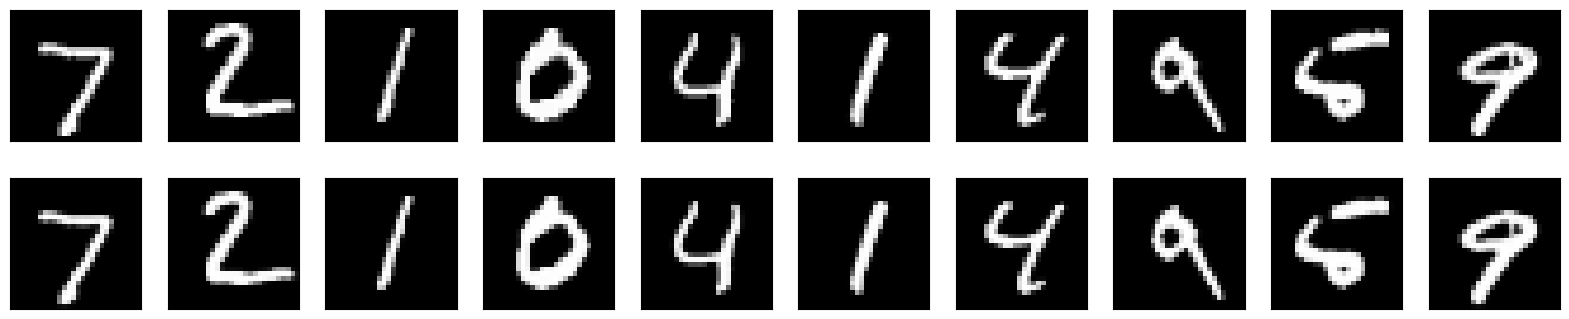

In [24]:
# Plot the original and predicted images for comparison
x_pred = model.predict(x_test)

plot_images(x_test, x_pred)